In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside the notebook
%matplotlib inline

# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')  # Make sure this file is in the same folder

# Display the first few rows of the dataset
df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# Show the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
# Describe numeric and categorical data
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [4]:
# Check if any column has missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

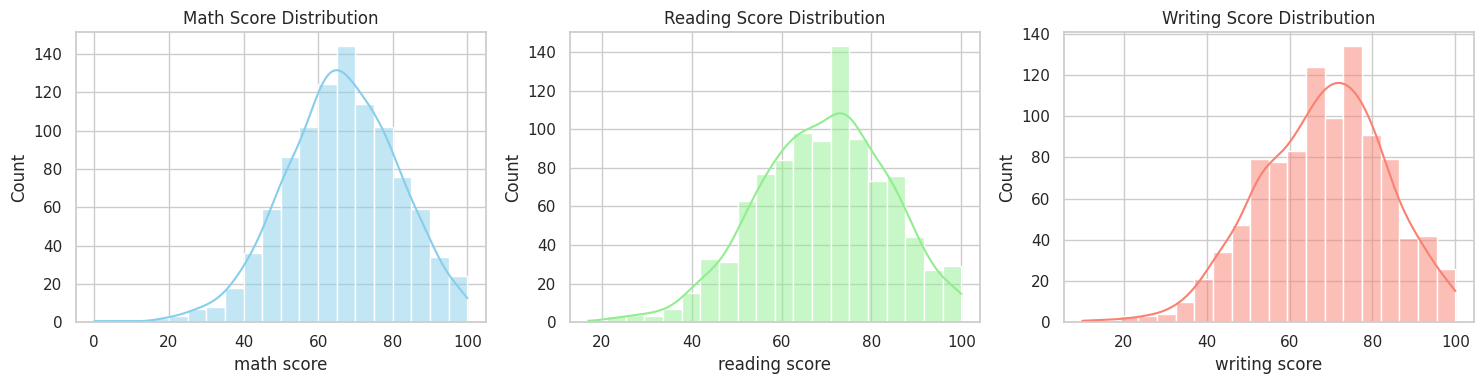

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visual style
sns.set(style='whitegrid')

# Plot distributions
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, bins=20, color='skyblue')
plt.title('Math Score Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, bins=20, color='lightgreen')
plt.title('Reading Score Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, bins=20, color='salmon')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()


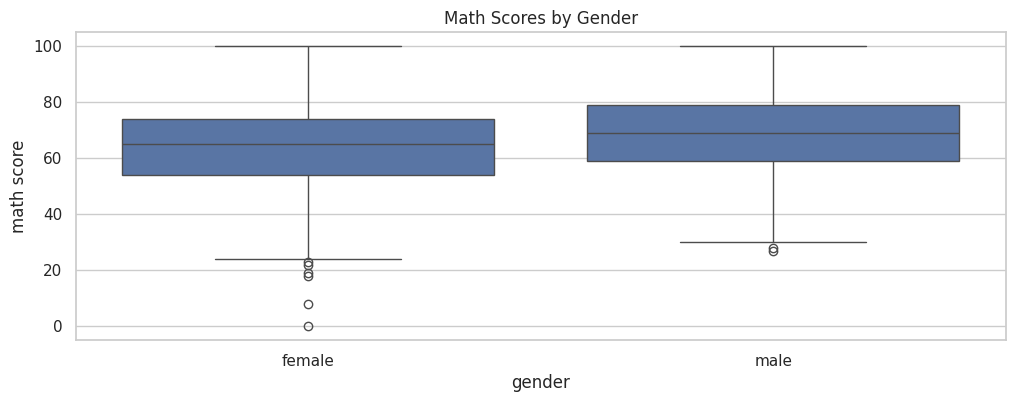

In [6]:
plt.figure(figsize=(12, 4))

sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Scores by Gender')
plt.show()

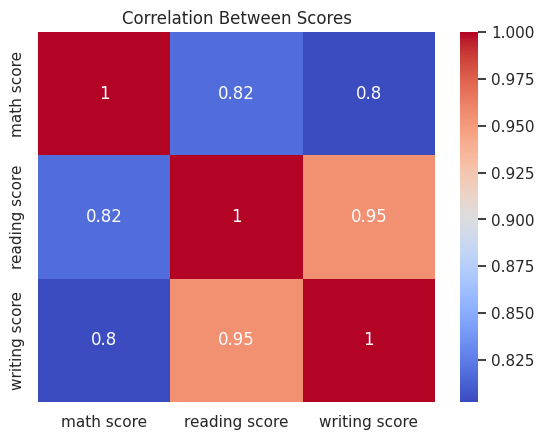

In [7]:
# Create a correlation matrix
correlation = df[['math score', 'reading score', 'writing score']].corr()

# Plot heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores')
plt.show()

In [8]:
# Create a new column for average score
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [9]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,math score,reading score,writing score,average score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,72.666667,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,82.333333,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,92.666667,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,49.333333,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,76.333333,True,False,True,False,False,False,False,False,True,False,True,True


In [11]:
# X = all columns except the target column
X = df_encoded.drop(['math score', 'reading score', 'writing score', 'average score'], axis=1)

# y = what we want to predict
y = df_encoded['average score']


In [12]:
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)


LinearRegression()

In [15]:
# Predict scores for test data
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 10.490182374209294
Mean Squared Error (MSE): 179.60234233623538
Root Mean Squared Error (RMSE): 13.401579844788277
R² Score: 0.16217185763155217
